<a href="https://colab.research.google.com/github/hbenedek/epfl-stochastic/blob/main/PS_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stochastic Calculus - Problem Set 12
## Names ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

## Exercise 2

## Exercise 3 

Consider the setup presented in the importance sampling section of the lecture sliedes: $L:= W_1$ denotes the annual loss of a portfolio. Let $p=0.001$ and let $q= 3.0902$ be the $(1-p)$-quantile of $L$. Compute the expected shortfall $ES = \frac{1}{p} \mathbb{E}_{\mathbb{P}}[L \mathbb{1}_{L\ge q}]$ in the following ways. 

In [19]:
# confidence interval

def mean_confidence_interval(data, confidence=0.95):
    return np.mean(data), scipy.stats.t.interval(confidence, len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data))

In [3]:
p = 0.001
q = 3.0902
M_list = [1000* 2**(2*2), 1000* 2**(2*3), 1000* 2**(2*4), 1000* 2**(2*5)]

(i) analytically exact

Let $X\sim \mathcal{N}(0,1)$ then we have $\frac{1}{p}\mathbb{E}[{\mathbb{1}_{\{L \geq q\}}L]}=\frac{1}{p}\int_q^{\infty}xf_X(x)dx=\frac{1}{p}\left[\frac{e^{-\frac{x^2}{2}}}{\sqrt{2\pi}}\right]_q^{\infty}=\frac{1}{p}\frac{e^{-\frac{q^2}{2}}}{\sqrt{2\pi}}$

In [21]:
1 / p * (np.exp(- (q**2 / 2)) / np.sqrt(2 * np.pi))

0.0017329988555755454

(ii) via Monte Carlo Simulation under $\mathbb{P}$

In [20]:
def monte_carlo(M, q):
  # simulate L
  mu, sigma = q, 1 
  L = np.random.normal(mu, sigma, M)

  # estimate ES
  sum = 0
  for i in range(M): 
    j = L[i]
    if j >= q: 
      sum+=j
  p = 1/M * sum
  return p

results_mc=[]
for M in M_list:
  ps = []
  for i in range(100):
    p = monte_carlo(M, q)
    ps.append(p)
  results_mc.append(mean_confidence_interval(ps))
  
print(results_mc)

[(1.942678064971592, (1.9396891159778624, 1.9456670139653216)), (1.9436450367115858, (1.9419650864915539, 1.9453249869316178)), (1.9437655107925675, (1.9429548152979739, 1.9445762062871612)), (1.9444850399308657, (1.9441285786349896, 1.944841501226742))]


(iii) via importance sampling

1. Simulate $M$ independent copies $L^{(1)},..., L^{(M)}$ of $N(q,1)$.
2. Estimate $p' = \frac{1}{M}\sum_{j=1}^M L^{(j)} e^{-qL^{(j)}+\frac{1}{2}q^2}1_{L^{(j)}\ge q}$

In [6]:
def importance_sampling(M, q):
  mu, sigma = q, 1 # mean and standard deviation
  s = np.random.normal(mu, sigma, M)
  sum = 0
  for i in range(M): 
    j = s[i]* np.exp(-q * s[i] + 1/2 * q * q)
    if j >= q: 
      sum+=j
  p_IS = 1/M * sum
  return p_IS

results_IS=[]
for M in M_list:
  ps = []
  for i in range(100):
    p_IS = importance_sampling(M, q)
    ps.append(p_IS)
  results_IS.append(mean_confidence_interval(ps))
  
print(results_IS)

[[0.2172594711826003, 0.21528890161767172, 0.2192300407475289], [0.21561777800312465, 0.21466841027165337, 0.21656714573459593], [0.216734994098491, 0.2161985272059662, 0.21727146099101582], [0.21681850204960845, 0.21653900444551422, 0.2170979996537027]]


Produce a plot similar to Fig 12 in the lecture notes.

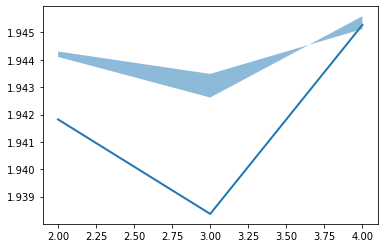

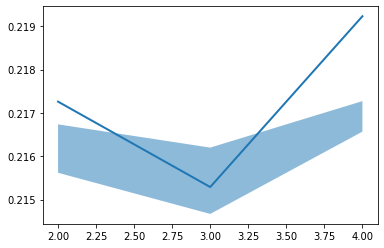

In [11]:
# plot
fig, ax = plt.subplots()
x =[2,3,4]

ax.fill_between(x, results_mc[:][1], results_mc[:][2], alpha=.5, linewidth=0)
ax.plot(x, results_mc[:][0], linewidth=2)

plt.show()


fig, ax = plt.subplots()

ax.fill_between(x, results_IS[:][1], results_IS[:][2], alpha=.5, linewidth=0)
ax.plot(x, results_IS[:][0], linewidth=2)


plt.show()